In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [3]:
boston.feature_names
#以下2个等价
boston.data[0][2]
boston.data[0,2]

2.3100000000000001

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.target.shape

(506,)

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
import pandas as pd
bos = pd.DataFrame(boston.data)
bos.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
X = bos.drop('PRICE', axis=1) #把名为PRICE的列删除,将神域的特征复制给X
y = bos['PRICE'] #把名为PRICE的列赋值给y
#X = boston.data
#y = boston.target
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [11]:
#导入模型
from sklearn.linear_model import LinearRegression
LR= LinearRegression() #生成模型
LR.fit(X_train, y_train) #训练模型
y_pred = LR.predict(X_test)
print("w0 = ", LR.intercept_) #输出截距
print("W = ", LR.coef_) #输出每个特征向量的权值
np.set_printoptions(precision=3, suppress=True)
print("w0 = {0:.3f}".format(LR.intercept_)) #输出截距
print("W = {}".format(LR.coef_)) #输出每个特征向量的权值

w0 =  37.9925927703
W =  [ -1.19858618e-01   4.44233009e-02   1.18612465e-02   2.51295058e+00
  -1.62710374e+01   3.84909910e+00  -9.85471557e-03  -1.50002715e+00
   2.41507916e-01  -1.10671867e-02  -1.01897720e+00   6.95273216e-03
  -4.88110587e-01]
w0 = 37.993
W = [ -0.12    0.044   0.012   2.513 -16.271   3.849  -0.01   -1.5     0.242
  -0.011  -1.019   0.007  -0.488]


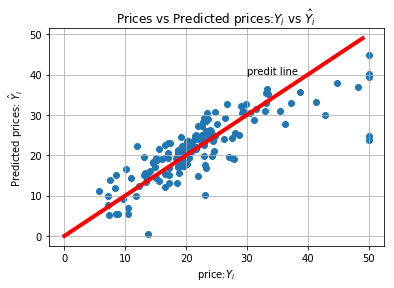

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred)
plt.xlabel("price:$Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices:$Y_i$ vs $\hat{Y}_i$")
plt.grid()

x = np.arange(0,50)
y = x 
plt.plot(x,y, color='red', lw=4)
plt.text(30,40, "predit line")
plt.show()

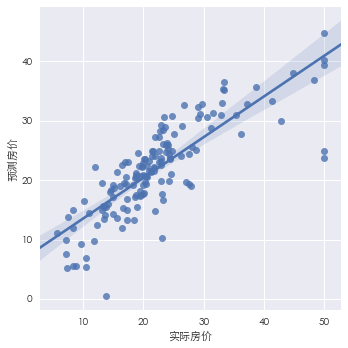

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#构造DataFrame数据集
data = pd.concat([pd.Series(y_test.values), pd.Series(y_pred)], axis=1)
data.columns = ['实际房价', '预测房价']
data.head()
plt.rcParams[u'font.sans-serif']=['STHeiti']
plt.rcParams['axes.unicode_minus'] = False 
sns.lmplot(x='实际房价', y = '预测房价', data=data)
plt.show()

In [21]:
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

27.1838476476


In [24]:
df = pd.DataFrame({'实际房价':y_test, '预测房价': y_pred})
df.head()

,实际房价,预测房价
329,22.6,24.935518
371,50.0,23.756686
219,23.0,29.336401
403,8.3,11.998984
78,21.2,21.375840


In [30]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, 
                                                    test_size = 0.3, 
                                                    random_state=0)
#导入线性回归模型并训练模型
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train, y_train)
#在测试机上预测
y_pred = LR.predict(X_test)

#模型评估
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, y_pred)
print("MSE = ", mse)

MSE =  27.1838476476
